# Rice Balst Disease Prediction using AI
### Developed by Batch 2 

In [2]:
import os
import glob
import pandas as pd
#set working directory
#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)
all_filenames = ["train_14d.csv", "test_14d.csv"]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
c:\users\mahes\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\mahes\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\mahes\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [4]:
# Read data file
BC_df = pd.read_csv("combined_csv.csv")
print("The shape of our dataset :"+str(BC_df.shape))
BC_df.head()

The shape of our dataset :(3551, 175)


,Unnamed: 0,label,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,...,Tc_mean,T cd_mean,RH_count,Precp_count,Precp_f,con_RH,con_Precp,con_good_tmp,Precp_T,month
0,1512,0,-1.365290,-0.923222,-1.339543,1.015785,0.978746,0.759838,0.660148,1.433364,...,-0.051064,-0.328291,12.0,1.0,0.571429,8.0,1.0,7.0,0.646445,6.0
1,1585,0,0.693535,0.428618,0.734359,0.198946,-0.342005,0.499561,1.124277,1.354817,...,-0.898061,-0.233231,4.0,1.0,0.642857,3.0,1.0,11.0,0.498596,6.0
2,1917,1,0.530605,0.340771,0.508779,0.640481,0.545067,0.608010,-0.964304,-0.608880,...,-0.096524,-0.111765,3.0,0.0,0.142857,2.0,0.0,9.0,0.053117,4.0
3,1865,1,0.500980,0.291968,0.450560,0.618404,0.111387,0.976736,0.079986,0.412242,...,-0.589409,-0.021986,5.0,0.0,0.714286,3.0,0.0,5.0,0.230655,4.0
4,2435,1,-0.098892,-0.064293,-0.073369,0.706711,0.623918,0.889977,0.079986,0.333695,...,-0.405176,-0.338853,8.0,3.0,0.500000,7.0,3.0,12.0,1.584941,6.0


In [5]:
BC_df.isnull().any()

Unnamed: 0      False
label           False
StnPres         False
StnPresMax      False
StnPresMin      False
                ...  
con_RH          False
con_Precp       False
con_good_tmp    False
Precp_T         False
month           False
Length: 175, dtype: bool

In [6]:
BC_df.drop("Unnamed: 0",axis=1,inplace=True)
#data.drop("label", axis=1, inplace=True)

In [7]:
BC_df.shape

(3551, 174)

In [8]:
diagnosis_set = set(BC_df['label'])
print(diagnosis_set)

{0, 1}


1    1826
0    1725
Name: label, dtype: int64


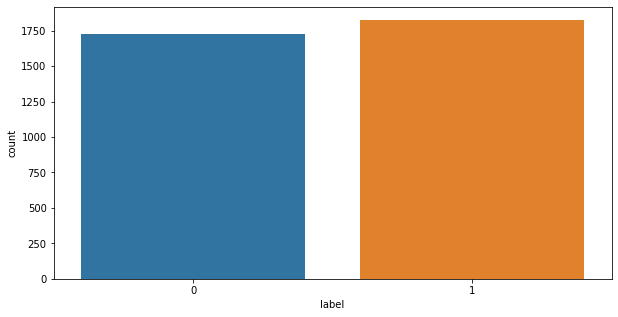

In [9]:
# Checking for imbalance 
BC_count = BC_df['label'].value_counts()
print(BC_count)
plt.figure(figsize=(10,5))
g = sns.countplot(BC_df['label'])
g.set_xticklabels(['0','1'])
plt.show()

In [10]:
X = BC_df.drop(columns={'label'})
X

,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,Precp,Tc,...,Tc_mean,T cd_mean,RH_count,Precp_count,Precp_f,con_RH,con_Precp,con_good_tmp,Precp_T,month
0,-1.365290,-0.923222,-1.339543,1.015785,0.978746,0.759838,0.660148,1.433364,-0.307268,0.489674,...,-0.051064,-0.328291,12.0,1.0,0.571429,8.0,1.0,7.0,0.646445,6.0
1,0.693535,0.428618,0.734359,0.198946,-0.342005,0.499561,1.124277,1.354817,0.116820,-1.352664,...,-0.898061,-0.233231,4.0,1.0,0.642857,3.0,1.0,11.0,0.498596,6.0
2,0.530605,0.340771,0.508779,0.640481,0.545067,0.608010,-0.964304,-0.608880,-0.307268,-0.012781,...,-0.096524,-0.111765,3.0,0.0,0.142857,2.0,0.0,9.0,0.053117,4.0
3,0.500980,0.291968,0.450560,0.618404,0.111387,0.976736,0.079986,0.412242,-0.307268,-1.319167,...,-0.589409,-0.021986,5.0,0.0,0.714286,3.0,0.0,5.0,0.230655,4.0
4,-0.098892,-0.064293,-0.073369,0.706711,0.623918,0.889977,0.079986,0.333695,-0.307268,-0.314255,...,-0.405176,-0.338853,8.0,3.0,0.500000,7.0,3.0,12.0,1.584941,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,0.730564,0.428618,0.705250,0.044409,0.347940,-0.302961,-1.312401,-1.708550,-0.307268,1.059125,...,0.252802,-0.391665,1.0,0.0,0.071429,1.0,0.0,0.0,0.014674,1.0
3547,-0.128517,-0.093573,-0.167972,0.066486,0.131100,-0.129443,-0.268110,-0.608880,-0.144157,0.422681,...,-0.438672,-0.011424,10.0,1.0,0.714286,6.0,1.0,0.0,0.655417,4.0
3548,-2.646505,-1.679667,-2.634822,0.750864,0.978746,0.868287,0.776180,1.040625,0.867129,0.322189,...,-0.249653,-0.296604,12.0,0.0,0.642857,9.0,0.0,6.0,0.170373,9.0
3549,0.360272,0.243165,0.370517,-1.169810,-0.913674,-1.148862,-1.544466,-1.551454,-0.307268,0.221698,...,-0.548734,0.432190,7.0,0.0,0.571429,5.0,0.0,0.0,0.323949,4.0


In [11]:
y = BC_df['label']
y

0       0
1       0
2       1
3       1
4       1
       ..
3546    0
3547    1
3548    1
3549    0
3550    1
Name: label, Length: 3551, dtype: int64

In [12]:
#using SMOTE from imblearn
import imblearn
from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state=0)
X_res, y_res = smote.fit_resample(X,y)
print('Resampled dataset shape %s' % y_res.value_counts())

Resampled dataset shape 0    966
1    866
Name: label, dtype: int64


In [13]:
print(y_res)

0       0
1       0
2       0
3       0
4       0
       ..
1827    1
1828    1
1829    1
1830    1
1831    1
Name: label, Length: 1832, dtype: int64


In [14]:
enoder = LabelEncoder().fit(y_res)
y_res = enoder.transform(y_res)
# BC_df.head()
y_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,
                                test_size=0.2,random_state=0)
print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (1465, 173)
Size of the training set: 1465
Shape of the testing set: (367, 173)
Size of the testing set: 367


In [1]:
scaler = StandardScaler().fit(x_train)
train_scaled = scaler.transform(x_train)
test_scaled = scaler.transform(x_test)

NameError: name 'StandardScaler' is not defined